# Prosjekt oppgave. 
## Dashbord for supportavdelingen


In [8]:
from datetime import timedelta, datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Oppgave a. Les inn data fra excel filen og lagre kolonnene i arrays

In [ ]:
FILENAME = "support_uke_24.xlsx"
UKEDAGER = ["Mandag", "Tirsdag", "Onsdag", "Torsdag", "Fredag"]

def read_xlsx(file_path:str) -> pd.DataFrame:
    '''Funksjon som leser inn en excel fil og returnerer en pandas dataframe'''
    return pd.read_excel(file_path)

# Leser inn excel filen som pandas dataframe
support_df = read_xlsx(FILENAME)

# Konverterer kolonnene til numpy arrays
u_dag = support_df["Ukedag"].to_numpy()
kl_slett = support_df["Klokkeslett"].to_numpy()
varighet = support_df["Varighet"].to_numpy()
score = support_df["Tilfredshet"].to_numpy()

# Fjerne NaN verdier fra score og setter de til None
score=np.where(pd.isna(score), None, score)

### oppgave b. Finne antall henvedelser per dag og visualisere ved bruk av et søylediagram

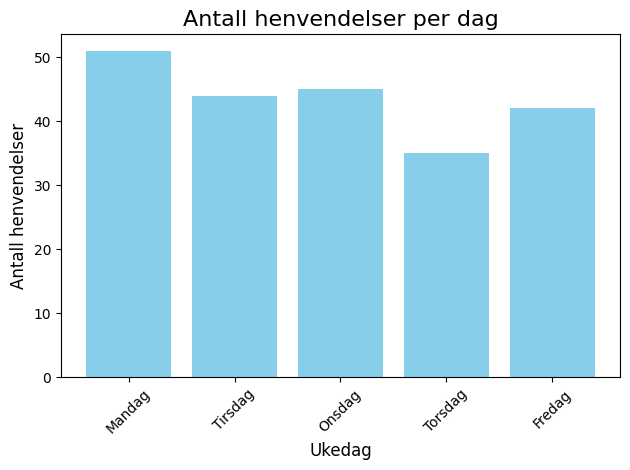

In [ ]:
def antall_henvendelser_per_dag(dager:np) -> dict:
    '''
    Funksjon som tar inn en np array med dager og
    returnerer en dictionary med antall henvendelser per dag
    '''
    return {dag:np.sum(dager==dag) for dag in UKEDAGER}

# Plotting av antall henvendelser per dag
antall_henvendelser=antall_henvendelser_per_dag(u_dag)
plt.bar(antall_henvendelser.keys(), antall_henvendelser.values(), color="skyblue")
plt.title("Antall henvendelser per dag", fontsize=16)
plt.xlabel("Ukedag", fontsize=12)
plt.xticks(rotation=45)
plt.ylabel("Antall henvendelser", fontsize=12)
plt.tight_layout()
plt.show()

### Oppgave c. Finn minste og lengste samtaletid som er loggført for uke 2

In [ ]:
# Minste og lengste samtaletid fra np array varighet
print (f"Minste samtaletid: {np.min(varighet)}")
print (f"Lengste samtaletid: {np.max(varighet)}")

Minste samtaletid: 00:00:59
Lengste samtaletid: 00:11:28


### Oppgave d. Regn ut gjennomsnittlig samtaletid basert på alle henvendelser i uke 24

In [ ]:
def regn_ut_gjennomsnittlig_samtaletid(varigheter:np) -> float:
    '''Funksjon som regner ut gjennomsnittlig samtaletid'''
    # Konverterer varighet til timedelta objekt
    sum_varighet = timedelta(0)
    # Itererer over varighet og summerer opp varighet av henvendelsene
    for var in varigheter:
        # Konverterer varighet til timedelta objekt
        tid = datetime.strptime(var, "%H:%M:%S")
        # Legger til varighet i sum_varighet
        sum_varighet += timedelta(hours=tid.hour, minutes=tid.minute, seconds=tid.second)
    return sum_varighet/len(varighet)

# Regner ut gjennomsnittlig samtaletid
print(f"Gjennomsnittlig samtaletid: {regn_ut_gjennomsnittlig_samtaletid(varighet)}")

Gjennomsnittlig samtaletid: 0:06:40.009217


### Oppgave e.  antall henvendelser tidsrommene 08-10, 10-12, 12-14 og 14-16 for uke 24

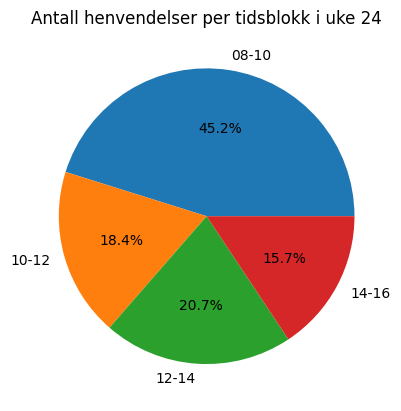

In [ ]:
def antall_henvendelser_per_bolk(klokkeslett:np)-> dict:
    '''Funksjon som returnerer antall henvendelser per tidsblokk'''
    # Definerer en dict for tidsblokkene
    antall= {"08-10":0, 
             "10-12":0, 
             "12-14":0, 
             "14-16":0}
    
    # Itererer over klokkeslett og teller antall henvendelser per tidsblokk
    for tid in klokkeslett:
        # Konverterer tid til datetime objekt
        time=int(tid.split(":")[0])
        # Bruke match-case for å sjekke hvilken tidsblokk tiden tilhører
        # og øke antallet i den aktuelle tidsblokken
        match time:
            case 8|9:
                antall["08-10"]+=1
            case 10|11:
                antall["10-12"]+=1
            case 12|13:
                antall["12-14"]+=1
            case 14|15|16:
                antall["14-16"]+=1
    return antall

# Plotting av antall henvendelser per tidsblokk
antall_pr_blokk=antall_henvendelser_per_bolk(kl_slett)
plt.pie(antall_pr_blokk.values(), labels=antall_pr_blokk.keys(), autopct='%1.1f%%')
plt.title("Antall henvendelser per tidsblokk i uke 24")
plt.show()

### Oppgave f. Supportavdelingens NP

In [20]:
def supportavdelingens_np(tilbakemeldinger:np) -> float:
    '''Funksjon som regner ut supportavdelingens NPS'''
    # Definerer en dict for fornøyd score
    fornoyd_score={"postiv":0, 
                   "noytral":0, 
                   "negativ":0}
    # Itererer over tilbakemeldinger og teller antall henvendelser per score
    for tilbakemelding in tilbakemeldinger:
        if tilbakemelding: # Utelukker None / Nan verdiene
            # Bruke match-case for å sjekke hvilken score tilbakemeldingen har
            # og øke antallet i den aktuelle kategorien
            match tilbakemelding:
                case _ as status if 1<=status<=6:
                    fornoyd_score["negativ"]+=1
                case _ as status if 7<=status<=8:
                    fornoyd_score["noytral"]+=1
                case _ as status if 9<=status<=10:
                    fornoyd_score["postiv"]+=1

    # Regner ut NPS score
    # NPS = % positive kunder - % negative kunder                
    antall_tilbakemeldinger = sum(fornoyd_score.values())
    #return ((fornoyd_score["postiv"]/antall_tilbakemeldinger)-(fornoyd_score["negativ"]/antall_tilbakemeldinger))*100
    return (fornoyd_score["postiv"]/antall_tilbakemeldinger)*100-(fornoyd_score["negativ"]/antall_tilbakemeldinger)*100
    
print(f"Supportavdelingens NP: {supportavdelingens_np(score):.2f}%")

Supportavdelingens NP: 41.86%
